In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Loading train and test Dataset and Concate them 

In [2]:
df_train = pd.read_csv("train_LZdllcl.csv")
df_test = pd.read_csv("test_2umaH9m.csv")
df_train.shape,df_test.shape

((54808, 14), (23490, 13))

In [3]:
df_concat = pd.concat([df_train,df_test],axis=0)

In [4]:
df_concat.shape

(78298, 14)

In [5]:
df_concat.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


# EDA

In [6]:
df_concat.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

In [7]:
df_concat.std()

employee_id             22602.830026
no_of_trainings             0.606766
age                         7.665928
previous_year_rating        1.260982
length_of_service           4.248070
KPIs_met >80%               0.478222
awards_won?                 0.150073
avg_training_score         13.383664
is_promoted                 0.279137
dtype: float64

In [8]:
df_concat.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


<AxesSubplot:>

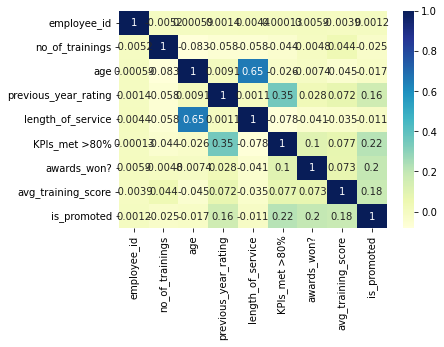

In [9]:
sns.heatmap(df_concat.corr(),annot=True,cmap="YlGnBu")

Univariate Analysis

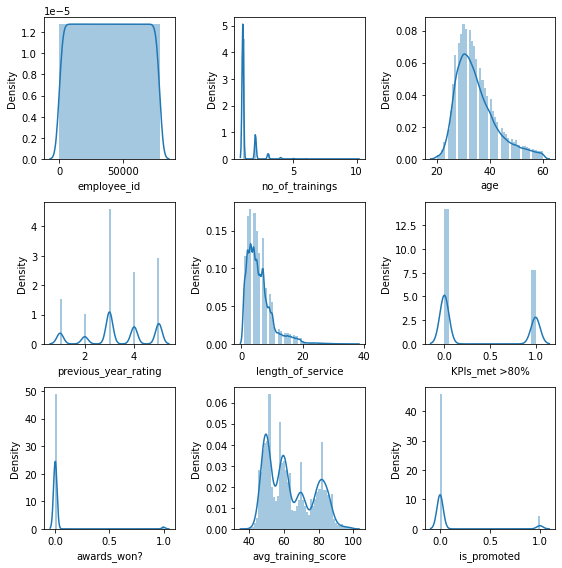

In [10]:
num_col = df_concat.select_dtypes(include=np.number).columns
c=1
plt.figure(figsize=(8,8))
for x in num_col:
    plt.subplot(3,3,c)
    sns.distplot(df_concat[x])
    c+=1
plt.tight_layout()

Checking Skenewss of data

In [11]:
#Ho: Data is normally distributed
#Ha: Data is not normnally distributed
df_concat.skew()

employee_id             2.765143e-19
no_of_trainings         3.403109e+00
age                     1.008714e+00
previous_year_rating   -3.148381e-01
length_of_service       1.728033e+00
KPIs_met >80%           6.104767e-01
awards_won?             6.356378e+00
avg_training_score      4.537268e-01
is_promoted             2.972339e+00
dtype: float64

In [12]:
# we can see data is skewed 

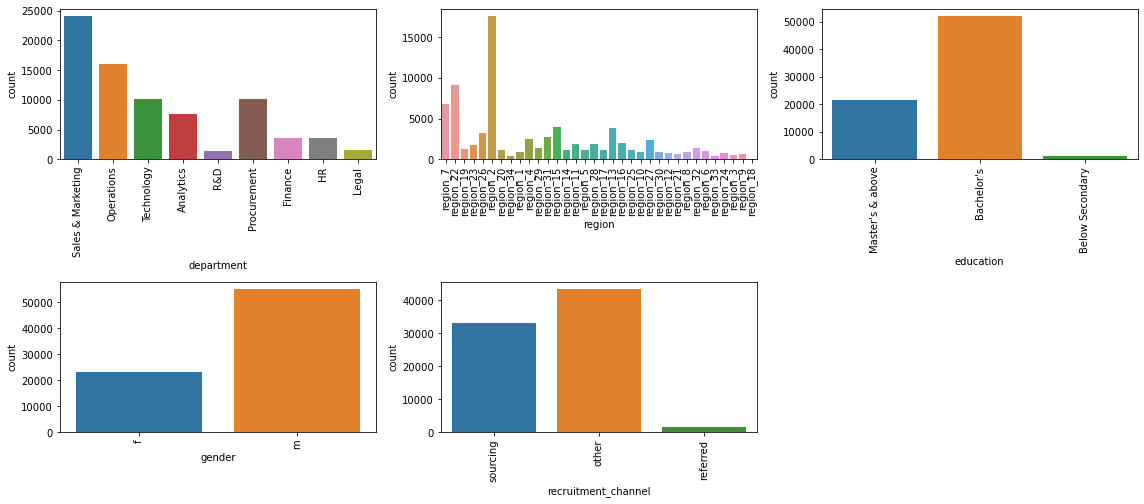

In [13]:
cat_col = df_concat.select_dtypes(include=object).columns
c=1
plt.figure(figsize=(16,10))
for x in cat_col:
    plt.subplot(3,3,c)
    sns.countplot(df_concat[x])
    plt.xticks(rotation=90)
    c+=1
plt.tight_layout()

In [14]:
#Sales&Marketing,Operations,procruitment are top 3 departments with more number of employyes
# Employees are highest in region_2
# Male peoples are more in the company


In [15]:
df_concat["department"].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [16]:
df_concat["region"].value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

In [17]:
df_concat[["education"]].value_counts()

education       
Bachelor's          52247
Master's & above    21429
Below Secondary      1179
dtype: int64

In [18]:
df_concat[["gender"]].value_counts()

gender
m         55092
f         23206
dtype: int64

In [19]:
df_concat[["recruitment_channel"]].value_counts()

recruitment_channel
other                  43524
sourcing               33181
referred                1593
dtype: int64

Bivariate Analysis

In [20]:
df_concat.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [21]:
pd.crosstab(df_concat["department"],df_concat["is_promoted"])

is_promoted,0.0,1.0
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


<AxesSubplot:xlabel='department'>

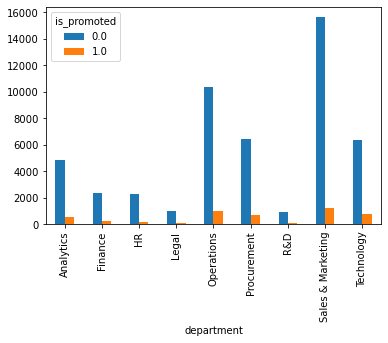

In [22]:
pd.crosstab(df_concat["department"],df_concat["is_promoted"]).plot(kind="bar")

In [23]:
for x in df_concat["department"].unique():
    print("Percentage of people promoted in the departmnet ",x," ",(len(df_concat.loc[(df_concat.department==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted in the departmnet  Sales & Marketing   1.5492094306367978
Percentage of people promoted in the departmnet  Operations   1.3065467828041584
Percentage of people promoted in the departmnet  Technology   0.9808679659761425
Percentage of people promoted in the departmnet  Analytics   0.6539119773174282
Percentage of people promoted in the departmnet  R&D   0.08812485631816905
Percentage of people promoted in the departmnet  Procurement   0.8786942195202943
Percentage of people promoted in the departmnet  Finance   0.26309739712380903
Percentage of people promoted in the departmnet  HR   0.1736953689749419
Percentage of people promoted in the departmnet  Legal   0.0676901070269994


In [24]:
# sales & Marketing have highest number of employees but yet Procrument have more percentage of people promoted 

In [25]:
pd.crosstab(df_concat["education"],df_concat["is_promoted"])


is_promoted,0.0,1.0
education,,
Bachelor's,33661,3008
Below Secondary,738,67
Master's & above,13454,1471


<AxesSubplot:xlabel='education'>

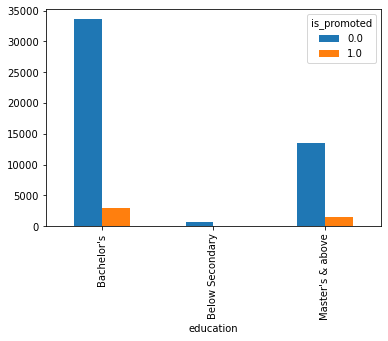

In [26]:
pd.crosstab(df_concat["education"],df_concat["is_promoted"]).plot(kind="bar")

In [27]:
for x in ["Master's & above", "Bachelor's",'Below Secondary']:
    print("Percentage of people promoted in the departmnet ",x," ",(len(df_concat.loc[(df_concat.education==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted in the departmnet  Master's & above   1.8787197629569083
Percentage of people promoted in the departmnet  Bachelor's   3.8417328667398913
Percentage of people promoted in the departmnet  Below Secondary   0.08557051265677285


In [28]:
#Number of people that are more promoted belongs to bachlers degree

In [29]:
for x in df_concat["region"].unique():
    print("Percentage of people promoted according to degree ",x," ",(len(df_concat.loc[(df_concat.region==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to degree  region_7   0.6590206646402207
Percentage of people promoted according to degree  region_22   0.9374441237324069
Percentage of people promoted according to degree  region_19   0.0676901070269994
Percentage of people promoted according to degree  region_23   0.17497254080563998
Percentage of people promoted according to degree  region_26   0.1826355717898286
Percentage of people promoted according to degree  region_2   1.263122940560423
Percentage of people promoted according to degree  region_20   0.06258141970420701
Percentage of people promoted according to degree  region_34   0.010217374645584816
Percentage of people promoted according to degree  region_1   0.07407596618048992
Percentage of people promoted according to degree  region_4   0.31418427035173313
Percentage of people promoted according to degree  region_29   0.05491838872001839
Percentage of people promoted according to degree  region_31   0.14048890137679124
Percentage of

In [30]:
#Region_2 have highest number of people promoted


In [31]:
pd.crosstab(df_concat["gender"],df_concat["is_promoted"])

is_promoted,0.0,1.0
gender,,
f,14845,1467
m,35295,3201


<AxesSubplot:xlabel='gender'>

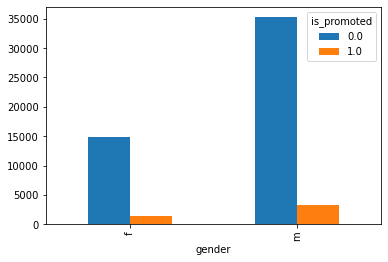

In [32]:
pd.crosstab(df_concat["gender"],df_concat["is_promoted"]).plot(kind="bar")

In [33]:
for x in df_concat["gender"].unique():
    print("Percentage of people promoted according to the gender ",x," ",(len(df_concat.loc[(df_concat.gender==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the gender  f   1.8736110756341158
Percentage of people promoted according to the gender  m   4.088227030064625


In [34]:
#percentage of promoted male employee are more than the female 

In [35]:

pd.crosstab(df_concat["no_of_trainings"],df_concat["is_promoted"])

is_promoted,0.0,1.0
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


In [36]:
for x in df_concat["no_of_trainings"].unique():
    print("Percentage of people promoted according to the number of training they have ",x," ",(len(df_concat.loc[(df_concat.no_of_trainings==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the number of training they have  1   4.99374185802958
Percentage of people promoted according to the number of training they have  2   0.7726889575723518
Percentage of people promoted according to the number of training they have  3   0.15581496334516845
Percentage of people promoted according to the number of training they have  4   0.03320646759815065
Percentage of people promoted according to the number of training they have  7   0.0
Percentage of people promoted according to the number of training they have  5   0.0038315154920943065
Percentage of people promoted according to the number of training they have  6   0.002554343661396204
Percentage of people promoted according to the number of training they have  8   0.0
Percentage of people promoted according to the number of training they have  10   0.0
Percentage of people promoted according to the number of training they have  9   0.0


In [37]:
# training more doesnt gave promotion


In [38]:
pd.crosstab(df_concat["age"],df_concat["is_promoted"])

is_promoted,0.0,1.0
age,,
20,109,4
21,93,5
22,213,18
23,394,34
24,775,70
25,1230,69
26,1897,163
27,2566,261
28,2839,308


In [39]:
l=sorted(df_concat["age"].unique())
for x in l:
    print("Percentage of people promoted according to the age factor ",x," ",(len(df_concat.loc[(df_concat.age==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the age factor  20   0.005108687322792408
Percentage of people promoted according to the age factor  21   0.006385859153490511
Percentage of people promoted according to the age factor  22   0.022989092952565838
Percentage of people promoted according to the age factor  23   0.04342384224373547
Percentage of people promoted according to the age factor  24   0.08940202814886715
Percentage of people promoted according to the age factor  25   0.08812485631816905
Percentage of people promoted according to the age factor  26   0.20817900840379064
Percentage of people promoted according to the age factor  27   0.33334184781220466
Percentage of people promoted according to the age factor  28   0.39336892385501543
Percentage of people promoted according to the age factor  29   0.375488518225242
Percentage of people promoted according to the age factor  30   0.41380367314618505
Percentage of people promoted according to the age factor  31   0.395923267

In [40]:
#middle age people are more highly likely to be promoted

In [41]:
pd.crosstab(df_concat["previous_year_rating"],df_concat["is_promoted"])

is_promoted,0.0,1.0
previous_year_rating,,
1.0,6135,88
2.0,4044,181
3.0,17263,1355
4.0,9093,784
5.0,9820,1921


In [42]:
l=[1.0,2.0,3.0,4.0,5.0]
for x in l:
    print("Percentage of people promoted according to the previous_work_rating  ",x," ",(len(df_concat.loc[(df_concat.previous_year_rating==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the previous_work_rating   1.0   0.112391121101433
Percentage of people promoted according to the previous_work_rating   2.0   0.23116810135635646
Percentage of people promoted according to the previous_work_rating   3.0   1.7305678305959284
Percentage of people promoted according to the previous_work_rating   4.0   1.0013027152673122
Percentage of people promoted according to the previous_work_rating   5.0   2.453447086771054


In [43]:
# people with 5 start rating have more chance of promotions 

In [44]:
pd.crosstab(df_concat["length_of_service"],df_concat["is_promoted"])

is_promoted,0.0,1.0
length_of_service,,
1,4170,377
2,6089,595
3,6424,609
4,6238,598
5,5357,475
6,4333,401
7,5087,464
8,2614,269
9,2400,229


In [45]:
for x in np.arange(1,38):
    try:
        print("Percentage of people promoted in the length_of_service ",x," ",(len(df_concat.loc[(df_concat.length_of_service==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat))
    
    except:
        continue

Percentage of people promoted in the length_of_service  1   0.004814937801731845
Percentage of people promoted in the length_of_service  2   0.007599172392653708
Percentage of people promoted in the length_of_service  3   0.007777976448951442
Percentage of people promoted in the length_of_service  4   0.007637487547574651
Percentage of people promoted in the length_of_service  5   0.006066566195815985
Percentage of people promoted in the length_of_service  6   0.00512145904109939
Percentage of people promoted in the length_of_service  7   0.005926077294439194
Percentage of people promoted in the length_of_service  8   0.003435592224577895
Percentage of people promoted in the length_of_service  9   0.002924723492298654
Percentage of people promoted in the length_of_service  10   0.0026054305346241285
Percentage of people promoted in the length_of_service  11   0.0012260849574701781
Percentage of people promoted in the length_of_service  12   0.0008046182533398043
Percentage of people pr

In [46]:
# lesser the length of service more chances for promotion

In [47]:
pd.crosstab(df_concat["KPIs_met >80%"],df_concat["is_promoted"])

is_promoted,0.0,1.0
KPIs_met >80%,,
0,34111,1406
1,16029,3262


<AxesSubplot:xlabel='KPIs_met >80%'>

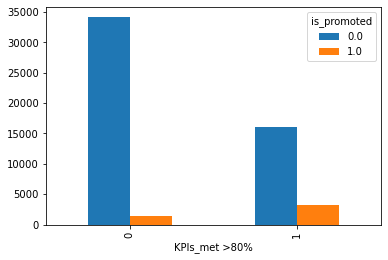

In [48]:
pd.crosstab(df_concat["KPIs_met >80%"],df_concat["is_promoted"]).plot(kind="bar")

In [49]:
for x in df_concat["KPIs_met >80%"].unique():
    print("Percentage of people promoted according to the criteria that they have kpi score more than 80% ",x," ",(len(df_concat.loc[(df_concat["KPIs_met >80%"]==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/len(df_concat)*100)

Percentage of people promoted according to the criteria that they have kpi score more than 80%  1   4.1661345117372095
Percentage of people promoted according to the criteria that they have kpi score more than 80%  0   1.7957035939615316


In [50]:
#So chnaces of promotion becomes more after KPI score is met

In [51]:
pd.crosstab(df_concat["awards_won?"],df_concat["is_promoted"])

is_promoted,0.0,1.0
awards_won?,,
0,49429,4109
1,711,559


In [52]:
for x in df_concat["awards_won?"].unique():
    print("Percentage of people promoted according to if award is one or not ",x," ",(len(df_concat.loc[(df_concat["awards_won?"]==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ])/len(df_concat))*100)

Percentage of people promoted according to if award is one or not  0   5.247899052338502
Percentage of people promoted according to if award is one or not  1   0.7139390533602391


In [53]:
# promotion chance increases when you have won a award

In [54]:
pd.crosstab(df_concat["avg_training_score"],df_concat["is_promoted"])

is_promoted,0.0,1.0
avg_training_score,,
39,2,0
40,5,0
41,25,1
42,60,2
43,169,7
...,...,...
95,0,45
96,1,47
97,0,49


In [55]:
for x in np.arange(39,100):
    try:
        print("Percentage of people promoted according to avg_training_score ",x," ",(len(df_concat.loc[(df_concat["avg_training_score"]==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ]))/(len(df_concat))*100)
    
    except:
        continue

Percentage of people promoted according to avg_training_score  39   0.0
Percentage of people promoted according to avg_training_score  40   0.0
Percentage of people promoted according to avg_training_score  41   0.001277171830698102
Percentage of people promoted according to avg_training_score  42   0.002554343661396204
Percentage of people promoted according to avg_training_score  43   0.008940202814886715
Percentage of people promoted according to avg_training_score  44   0.012771718306981022
Percentage of people promoted according to avg_training_score  45   0.03959232675164116
Percentage of people promoted according to avg_training_score  46   0.045978185905131676
Percentage of people promoted according to avg_training_score  47   0.10089657462515006
Percentage of people promoted according to avg_training_score  48   0.1226084957470178
Percentage of people promoted according to avg_training_score  49   0.12771718306981023
Percentage of people promoted according to avg_training_scor

Things to do in future eng. -
1- binning regions according to the percentage of promotions
2- mapping no-of training (10-1,9-2,8-3,...)
3 - mapping length_of_service
4 - filling null value of previous year work with help of department,lengthofservice (and age)
5 - filling null values of education with help of age
6 - binning department 
7- mapping recruitment channel giving priority to reffered

# Dealing with missing values

In [56]:
df_concat.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


Dealing null values of education with help of gender and age

In [57]:
ed_age=df_concat.groupby(["gender","age","education"]).size().reset_index()

In [58]:
f = ed_age.loc[ed_age.gender=="f"]

In [59]:
m=ed_age.loc[ed_age.gender=="m"]

In [60]:
f.iloc[1:15]
# till 23 age female are more below secondary 

,gender,age,education,0
1,f,20,Below Secondary,20
2,f,20,Master's & above,6
3,f,21,Below Secondary,30
4,f,22,Bachelor's,24
5,f,22,Below Secondary,51
6,f,23,Bachelor's,60
7,f,23,Below Secondary,78
8,f,24,Bachelor's,201
9,f,24,Below Secondary,113
10,f,25,Bachelor's,415


In [61]:
f.iloc[8:38]
# 24-37 age female are more bachelors

,gender,age,education,0
8,f,24,Bachelor's,201
9,f,24,Below Secondary,113
10,f,25,Bachelor's,415
11,f,25,Below Secondary,71
12,f,26,Bachelor's,742
13,f,26,Below Secondary,45
14,f,26,Master's & above,2
15,f,27,Bachelor's,1078
16,f,27,Below Secondary,7
17,f,27,Master's & above,2


In [62]:
f.iloc[38:]
#after 37 there are more masters 

,gender,age,education,0
38,f,38,Bachelor's,407
39,f,38,Master's & above,412
40,f,39,Bachelor's,357
41,f,39,Master's & above,363
42,f,40,Bachelor's,291
43,f,40,Master's & above,317
44,f,41,Bachelor's,205
45,f,41,Master's & above,297
46,f,42,Bachelor's,210
47,f,42,Master's & above,236


In [63]:
m.iloc[0:]
# till 41 bachelors are more 
# after 42 going with master

,gender,age,education,0
84,m,20,Bachelor's,66
85,m,20,Below Secondary,28
86,m,20,Master's & above,8
87,m,21,Bachelor's,6
88,m,21,Below Secondary,40
...,...,...,...,...
168,m,58,Master's & above,114
169,m,59,Bachelor's,73
170,m,59,Master's & above,86
171,m,60,Bachelor's,85


In [64]:
"""df_concat["education"].fillna("Bachelor's",inplace=True)"""

'df_concat["education"].fillna("Bachelor\'s",inplace=True)'

In [65]:
df_concat.loc[(df_concat.gender=="f") & (df_concat.age.isin([20,21,22,23])) & (df_concat.education.isnull()),"education"] = "Below Secondary"
df_concat.loc[(df_concat.gender=="f") & (df_concat.age.isin(np.arange(24,38)))  & (df_concat.education.isnull()),"education"] = "Bachelor's"
df_concat.loc[(df_concat.gender=="f") & (df_concat.age.isin(np.arange(38,61))) & (df_concat.education.isnull()),"education"] = "Master's & above"
df_concat.loc[(df_concat.gender=="m") & (df_concat.age.isin(np.arange(20,42))) & (df_concat.education.isnull()),"education"] = "Bachelor's"
df_concat.loc[(df_concat.gender=="m") & (df_concat.age.isin(np.arange(42,61))) & (df_concat.education.isnull()),"education"] = "Master's & above"


Dealing null values of previous_year rating 

In [66]:
len(df_concat[df_concat["previous_year_rating"].isnull()])

5936

In [67]:
df_concat[df_concat["previous_year_rating"].isnull()]["length_of_service"]

10       1
23       1
29       1
56       1
58       1
        ..
23406    1
23436    1
23445    1
23479    1
23488    1
Name: length_of_service, Length: 5936, dtype: int64

In [68]:
pyr=df_concat[(df_concat["previous_year_rating"].notnull()) & (df_concat["length_of_service"]==37)]

In [69]:
# conatins null values where length of service ==37

In [70]:
pyr.groupby(["gender","department"])["previous_year_rating"].median()

gender  department       
m       Sales & Marketing    5.0
Name: previous_year_rating, dtype: float64

In [71]:
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Analytics") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Finance") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="HR") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Legal") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=5.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Operations") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Procurement") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="R&D") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Sales & Marketing") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="f") & (df_concat["department"]=="Technology") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0

In [72]:
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Analytics") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Finance") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="HR") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Legal") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Operations") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Procurement") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="R&D") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=4.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Sales & Marketing") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0
df_concat.loc[(df_concat["gender"]=="m") & (df_concat["department"]=="Technology") & (df_concat["previous_year_rating"].isnull()),"previous_year_rating"]=3.0

In [73]:
"""df_concat.fillna(0,inplace=True)"""

'df_concat.fillna(0,inplace=True)'

In [74]:
# making a new column experience based on precious year rating
"""def experience(r):
    if r>0:
        return "experienced"
    else:
        return "fresher"
        """

'def experience(r):\n    if r>0:\n        return "experienced"\n    else:\n        return "fresher"\n        '

Making a new column according to region

In [75]:
"""df_concat["experience"] = df_concat["previous_year_rating"].apply(experience)"""

'df_concat["experience"] = df_concat["previous_year_rating"].apply(experience)'

Binning regions into three category according to the insieght we get in eda 

In [76]:
region = pd.DataFrame({"region":np.arange(1,35),"% of promotion":np.arange(1,35)})

In [77]:
i=0
for x in df_concat["region"].unique():
    region.iloc[i,0]=x
    region.iloc[i,1]=len(df_concat.loc[(df_concat.region==x) & (df_concat["is_promoted"]==1.0),"is_promoted" ])/len(df_concat)*100
    i+=1

In [78]:
region.sort_values(by="% of promotion",ascending=False,inplace=True)

In [79]:
region

,region,% of promotion
5,region_2,1.263123
1,region_22,0.937444
0,region_7,0.659021
9,region_4,0.314184
18,region_13,0.293750
12,region_15,0.283532
16,region_28,0.196684
4,region_26,0.182636
3,region_23,0.174973
22,region_27,0.167310


In [80]:
df_concat["region"]=df_concat["region"].map({'region_2':3,
 'region_22':3,
 'region_7':3,
 'region_4':3,
 'region_13':3,
 'region_15':3,
 'region_28':3,
 'region_26':3,
 'region_23':3,
 'region_27':3,
 'region_31':3,
 'region_17':3,
 'region_25':3,
 'region_16':3,
 'region_11':2,
 'region_14':2,
 'region_30':2,
 'region_1':2,
 'region_19':2,
 'region_8':2,
 'region_10':2,
 'region_20':2,
 'region_29':2,
 'region_32':2,
 'region_3':2,
 'region_5':2,
 'region_12':2,
 'region_6':2,
 'region_21':1,
 'region_24':1,
 'region_33':1,
 'region_34':1,
 'region_9':1,
 'region_18':1})
#28-36
#29-16

mapping no_of_trainings for better result

In [81]:
df_concat["no_of_trainings"]=df_concat["no_of_trainings"].map({10:1,9:2,8:3,7:4,6:5,5:6,4:7,3:8,2:9,1:10})

mapping length_of_service for better result

In [82]:
"""d=dict()
i=1
j=37
for k in range(37):
    d[i]=j
    i+=1
    j-=1"""


'd=dict()\ni=1\nj=37\nfor k in range(37):\n    d[i]=j\n    i+=1\n    j-=1'

In [83]:
"""df_concat["length_of_service"]=df_concat["length_of_service"].map(d)"""

'df_concat["length_of_service"]=df_concat["length_of_service"].map(d)'

In [84]:
# making bins to length of service according to promotion column
def service_length(l):
    if l in np.arange(1,11):
        return 4
    elif l in np.arange(11,21):
        return 3
    elif l in np.arange(21,31):
        return 2
    else:
        return 1
df_concat["length_of_service"]=df_concat["length_of_service"].apply(service_length)

In [85]:
df_concat["gender"] = df_concat["gender"].map({"m":0,"f":1})
# as female have more chance of promotion

In [86]:
"""df_concat["recruitment_channel"].unique()"""

'df_concat["recruitment_channel"].unique()'

In [87]:
# bad effect on model

In [88]:
"""df_concat["recruitment_channel"] = df_concat["recruitment_channel"].map({'sourcing':1, 'other':1, 'referred':2})"""

'df_concat["recruitment_channel"] = df_concat["recruitment_channel"].map({\'sourcing\':1, \'other\':1, \'referred\':2})'

In [89]:
df_concat.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

# Data Preprocessing

droping unwanted features


In [90]:
df_concat["education"] = df_concat["education"].map({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})

In [91]:
df_concat.drop(["employee_id"],axis=1,inplace=True)

In [92]:
df_train_cleaned = df_concat.iloc[0:54808]
df_test_cleaned = df_concat.iloc[54808:].drop("is_promoted",axis=1)

data scaling

In [93]:
df_train_cleaned.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,3,3,1,sourcing,10,35,5.0,4,1,0,49,0.0
1,Operations,3,2,0,other,10,30,5.0,4,0,0,60,0.0
2,Sales & Marketing,2,2,0,sourcing,10,34,3.0,4,0,0,50,0.0
3,Sales & Marketing,3,2,0,other,9,39,1.0,4,0,0,50,0.0
4,Technology,3,2,0,other,10,45,3.0,4,0,0,73,0.0


In [94]:
df_train_cleaned[["age","avg_training_score"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train_cleaned[["age","avg_training_score"]])

StandardScaler()

In [95]:
df_train_cleaned[["age","avg_training_score"]] = scaler.transform(df_train_cleaned[["age","avg_training_score"]])
df_test_cleaned[["age","avg_training_score"]] =scaler.transform(df_test_cleaned[["age","avg_training_score"]] )

changing dtype of target column to int

In [96]:
df_train_cleaned["previous_year_rating"]=df_train_cleaned["previous_year_rating"].astype(int)
df_test_cleaned["previous_year_rating"] = df_test_cleaned["previous_year_rating"].astype(int)
df_train_cleaned["is_promoted"] = df_train_cleaned["is_promoted"].astype(int)

In [97]:
df_train_scaled = pd.get_dummies(df_train_cleaned,drop_first=True)
df_test_scaled = pd.get_dummies(df_test_cleaned,drop_first=True)

In [98]:
df_train_scaled.head()

,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing
0,3,3,1,10,0.025598,5,4,1,0,-1.075931,...,0,0,0,0,0,0,1,0,0,1
1,3,2,0,10,-0.627135,5,4,0,0,-0.253282,...,0,0,0,1,0,0,0,0,0,0
2,2,2,0,10,-0.104948,3,4,0,0,-1.001145,...,0,0,0,0,0,0,1,0,0,1
3,3,2,0,9,0.547785,1,4,0,0,-1.001145,...,0,0,0,0,0,0,1,0,0,0
4,3,2,0,10,1.331064,3,4,0,0,0.718939,...,0,0,0,0,0,0,0,1,0,0


# Model Building

light gbm

In [99]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(subsample_freq = 2,objective ="binary",importance_type = "gain",verbosity = -1,max_bin = 60,num_leaves = 300,boosting_type = 'dart',learning_rate=0.15,n_estimators=494,max_depth=5,scale_pos_weight=2.5)

In [100]:
lgb.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

LGBMClassifier(boosting_type='dart', importance_type='gain', learning_rate=0.15,
               max_bin=60, max_depth=5, n_estimators=494, num_leaves=300,
               objective='binary', scale_pos_weight=2.5, subsample_freq=2,
               verbosity=-1)

In [101]:
pred_y=lgb.predict(df_test_scaled)

In [102]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y)],axis=1)

In [103]:
pred.columns = ["employee_id","is_promoted"]

In [104]:
pred.to_csv("lgb.csv",index=False)

In [105]:
#f1 score - 0.4736
#f1 final score -0.5148

xgboost

In [106]:
df_train_scaled["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [107]:
maj = len(df_train_scaled[df_train_scaled["is_promoted"]==0])
mino = len(df_train_scaled[(df_train_scaled["is_promoted"]==1)])

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1,n_estimators=494,max_depth=5,subsample = 0.70,verbosity = 0,scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2
                )
xgb.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=494, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5, subsample=0.7,
              tree_method='auto', updater='grow_histmaker',
              validate_parameters=1, verbosity=0)

In [109]:
pred_y_xgb = xgb.predict(df_test_scaled)

In [110]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_xgb)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("xgb.csv",index=False)

In [111]:
pred["is_promoted"].value_counts()

0    22277
1     1213
Name: is_promoted, dtype: int64

In [112]:
# f1 score 0.4871

# f1 final score0.5098

CatBoost

In [113]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

Learning rate set to 0.05694
0:	learn: 0.6194717	total: 291ms	remaining: 4m 50s
1:	learn: 0.5637134	total: 329ms	remaining: 2m 44s
2:	learn: 0.5139679	total: 368ms	remaining: 2m 2s
3:	learn: 0.4739399	total: 401ms	remaining: 1m 39s
4:	learn: 0.4242098	total: 437ms	remaining: 1m 26s
5:	learn: 0.3975850	total: 470ms	remaining: 1m 17s
6:	learn: 0.3749197	total: 501ms	remaining: 1m 11s
7:	learn: 0.3445303	total: 521ms	remaining: 1m 4s
8:	learn: 0.3272169	total: 543ms	remaining: 59.7s
9:	learn: 0.3126642	total: 561ms	remaining: 55.5s
10:	learn: 0.2971144	total: 579ms	remaining: 52.1s
11:	learn: 0.2868203	total: 601ms	remaining: 49.5s
12:	learn: 0.2761935	total: 620ms	remaining: 47.1s
13:	learn: 0.2678862	total: 639ms	remaining: 45s
14:	learn: 0.2617173	total: 656ms	remaining: 43.1s
15:	learn: 0.2542494	total: 674ms	remaining: 41.4s
16:	learn: 0.2480255	total: 692ms	remaining: 40s
17:	learn: 0.2443150	total: 711ms	remaining: 38.8s
18:	learn: 0.2402448	total: 729ms	remaining: 37.6s
19:	learn:

163:	learn: 0.1604950	total: 3.45s	remaining: 17.6s
164:	learn: 0.1604412	total: 3.47s	remaining: 17.6s
165:	learn: 0.1603850	total: 3.49s	remaining: 17.5s
166:	learn: 0.1603005	total: 3.51s	remaining: 17.5s
167:	learn: 0.1601557	total: 3.53s	remaining: 17.5s
168:	learn: 0.1600832	total: 3.54s	remaining: 17.4s
169:	learn: 0.1599954	total: 3.56s	remaining: 17.4s
170:	learn: 0.1599392	total: 3.58s	remaining: 17.4s
171:	learn: 0.1598395	total: 3.6s	remaining: 17.3s
172:	learn: 0.1597963	total: 3.62s	remaining: 17.3s
173:	learn: 0.1597377	total: 3.64s	remaining: 17.3s
174:	learn: 0.1597086	total: 3.66s	remaining: 17.2s
175:	learn: 0.1596416	total: 3.68s	remaining: 17.2s
176:	learn: 0.1594815	total: 3.7s	remaining: 17.2s
177:	learn: 0.1594274	total: 3.71s	remaining: 17.2s
178:	learn: 0.1593202	total: 3.73s	remaining: 17.1s
179:	learn: 0.1592583	total: 3.75s	remaining: 17.1s
180:	learn: 0.1591220	total: 3.77s	remaining: 17.1s
181:	learn: 0.1590939	total: 3.79s	remaining: 17s
182:	learn: 0.15

322:	learn: 0.1530279	total: 6.39s	remaining: 13.4s
323:	learn: 0.1530062	total: 6.41s	remaining: 13.4s
324:	learn: 0.1529835	total: 6.42s	remaining: 13.3s
325:	learn: 0.1529286	total: 6.44s	remaining: 13.3s
326:	learn: 0.1528933	total: 6.46s	remaining: 13.3s
327:	learn: 0.1528669	total: 6.48s	remaining: 13.3s
328:	learn: 0.1528448	total: 6.5s	remaining: 13.3s
329:	learn: 0.1528152	total: 6.52s	remaining: 13.2s
330:	learn: 0.1527736	total: 6.54s	remaining: 13.2s
331:	learn: 0.1527487	total: 6.56s	remaining: 13.2s
332:	learn: 0.1527213	total: 6.58s	remaining: 13.2s
333:	learn: 0.1526920	total: 6.6s	remaining: 13.2s
334:	learn: 0.1526576	total: 6.62s	remaining: 13.1s
335:	learn: 0.1526352	total: 6.64s	remaining: 13.1s
336:	learn: 0.1526078	total: 6.65s	remaining: 13.1s
337:	learn: 0.1525919	total: 6.67s	remaining: 13.1s
338:	learn: 0.1525618	total: 6.69s	remaining: 13s
339:	learn: 0.1525392	total: 6.71s	remaining: 13s
340:	learn: 0.1525222	total: 6.73s	remaining: 13s
341:	learn: 0.152501

484:	learn: 0.1489430	total: 9.38s	remaining: 9.96s
485:	learn: 0.1489228	total: 9.39s	remaining: 9.94s
486:	learn: 0.1488940	total: 9.41s	remaining: 9.92s
487:	learn: 0.1488671	total: 9.43s	remaining: 9.9s
488:	learn: 0.1488410	total: 9.45s	remaining: 9.88s
489:	learn: 0.1488130	total: 9.47s	remaining: 9.86s
490:	learn: 0.1487862	total: 9.49s	remaining: 9.84s
491:	learn: 0.1487535	total: 9.51s	remaining: 9.82s
492:	learn: 0.1487274	total: 9.53s	remaining: 9.8s
493:	learn: 0.1487132	total: 9.54s	remaining: 9.78s
494:	learn: 0.1486835	total: 9.56s	remaining: 9.76s
495:	learn: 0.1486707	total: 9.58s	remaining: 9.74s
496:	learn: 0.1486575	total: 9.6s	remaining: 9.72s
497:	learn: 0.1486159	total: 9.62s	remaining: 9.7s
498:	learn: 0.1485751	total: 9.64s	remaining: 9.68s
499:	learn: 0.1485574	total: 9.66s	remaining: 9.66s
500:	learn: 0.1485201	total: 9.68s	remaining: 9.64s
501:	learn: 0.1484963	total: 9.7s	remaining: 9.62s
502:	learn: 0.1484787	total: 9.71s	remaining: 9.6s
503:	learn: 0.1484

646:	learn: 0.1453086	total: 12.3s	remaining: 6.72s
647:	learn: 0.1453006	total: 12.3s	remaining: 6.7s
648:	learn: 0.1452877	total: 12.4s	remaining: 6.68s
649:	learn: 0.1452761	total: 12.4s	remaining: 6.66s
650:	learn: 0.1452672	total: 12.4s	remaining: 6.64s
651:	learn: 0.1452399	total: 12.4s	remaining: 6.62s
652:	learn: 0.1452213	total: 12.4s	remaining: 6.6s
653:	learn: 0.1452081	total: 12.4s	remaining: 6.58s
654:	learn: 0.1451891	total: 12.5s	remaining: 6.56s
655:	learn: 0.1451641	total: 12.5s	remaining: 6.54s
656:	learn: 0.1451408	total: 12.5s	remaining: 6.52s
657:	learn: 0.1451268	total: 12.5s	remaining: 6.5s
658:	learn: 0.1451219	total: 12.5s	remaining: 6.48s
659:	learn: 0.1451117	total: 12.5s	remaining: 6.46s
660:	learn: 0.1450929	total: 12.6s	remaining: 6.45s
661:	learn: 0.1450773	total: 12.6s	remaining: 6.44s
662:	learn: 0.1450625	total: 12.7s	remaining: 6.43s
663:	learn: 0.1450479	total: 12.7s	remaining: 6.42s
664:	learn: 0.1450336	total: 12.7s	remaining: 6.41s
665:	learn: 0.1

814:	learn: 0.1422555	total: 15.4s	remaining: 3.5s
815:	learn: 0.1422443	total: 15.5s	remaining: 3.48s
816:	learn: 0.1422261	total: 15.5s	remaining: 3.47s
817:	learn: 0.1422098	total: 15.5s	remaining: 3.45s
818:	learn: 0.1422036	total: 15.5s	remaining: 3.43s
819:	learn: 0.1421746	total: 15.5s	remaining: 3.41s
820:	learn: 0.1421588	total: 15.5s	remaining: 3.39s
821:	learn: 0.1421483	total: 15.6s	remaining: 3.37s
822:	learn: 0.1421382	total: 15.6s	remaining: 3.35s
823:	learn: 0.1421116	total: 15.6s	remaining: 3.33s
824:	learn: 0.1420935	total: 15.6s	remaining: 3.31s
825:	learn: 0.1420682	total: 15.6s	remaining: 3.29s
826:	learn: 0.1420442	total: 15.7s	remaining: 3.27s
827:	learn: 0.1420307	total: 15.7s	remaining: 3.26s
828:	learn: 0.1420114	total: 15.7s	remaining: 3.23s
829:	learn: 0.1419949	total: 15.7s	remaining: 3.21s
830:	learn: 0.1419717	total: 15.7s	remaining: 3.19s
831:	learn: 0.1419534	total: 15.7s	remaining: 3.17s
832:	learn: 0.1419398	total: 15.7s	remaining: 3.15s
833:	learn: 0

979:	learn: 0.1396461	total: 18.4s	remaining: 375ms
980:	learn: 0.1396367	total: 18.4s	remaining: 357ms
981:	learn: 0.1396220	total: 18.4s	remaining: 338ms
982:	learn: 0.1396130	total: 18.4s	remaining: 319ms
983:	learn: 0.1396006	total: 18.5s	remaining: 300ms
984:	learn: 0.1395809	total: 18.5s	remaining: 281ms
985:	learn: 0.1395697	total: 18.5s	remaining: 263ms
986:	learn: 0.1395531	total: 18.5s	remaining: 244ms
987:	learn: 0.1395425	total: 18.5s	remaining: 225ms
988:	learn: 0.1395159	total: 18.6s	remaining: 206ms
989:	learn: 0.1394969	total: 18.6s	remaining: 188ms
990:	learn: 0.1394682	total: 18.6s	remaining: 169ms
991:	learn: 0.1394489	total: 18.6s	remaining: 150ms
992:	learn: 0.1394361	total: 18.6s	remaining: 131ms
993:	learn: 0.1394346	total: 18.6s	remaining: 113ms
994:	learn: 0.1394190	total: 18.7s	remaining: 93.8ms
995:	learn: 0.1394084	total: 18.7s	remaining: 75ms
996:	learn: 0.1394019	total: 18.7s	remaining: 56.3ms
997:	learn: 0.1393879	total: 18.7s	remaining: 37.5ms
998:	learn

In [114]:
pred_y_cat = cbc.predict(df_test_scaled)

In [115]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_cat)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("catboost.csv",index=False)

In [116]:
# f1-score 0.4899
# final f1 score - 0.488

RandomForest

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])

RandomForestClassifier()

In [118]:
pred_y_rf = rf.predict(df_test_scaled)

In [119]:
pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_rf)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("rf.csv",index=False)

In [120]:
# f1 square 0.43
# f1 final score 0.44

taking voting from our top three classifier

In [121]:
df_lgb = pd.read_csv("lgb.csv")
df_xgb = pd.read_csv("xgb.csv")
df_cat = pd.read_csv("catboost.csv")

In [122]:
df = df_lgb["employee_id"]
df = pd.concat([df,pd.DataFrame(np.arange(0,23490))],axis=1)

In [123]:
for i in range(1,23490):
    d = {0:0,1:0}
    if df_lgb.iloc[i,1]==0:
        d[0]=d[0]+1
    else:
        d[1]=d[1]+1
    if df_xgb.iloc[i,1]==0:
        d[0]=d[0]+1
    else:
        d[1]=d[1]+1
    if df_cat.iloc[i,1]==0:
        d[0]=d[0]+1
    else:
        d[1]=d[1]+1
    if d[0]>d[1]:
        df.iloc[i,1]=0
    else:
        df.iloc[i,1]=1
    # giving priority to lighGBM for 1 occurance
    if df_lgb.iloc[i,1]==1:
        df.iloc[i,1]=1

In [124]:
df.columns = ["employee_id","is_promoted"]
df.to_csv("Pvoting.csv",index=False)
# final score 0.52

In [125]:
# not giving priority to lgb
df = df_lgb["employee_id"]
df = pd.concat([df,pd.DataFrame(np.arange(0,23490))],axis=1)
for i in range(1,23490):
    d = {0:0,1:0}
    if df_lgb.iloc[i,1]==0:
        d[0]=d[0]+1
    else:
        d[1]=d[1]+1
    if df_xgb.iloc[i,1]==0:
        d[0]=d[0]+1
    else:
        d[1]=d[1]+1
    if df_cat.iloc[i,1]==0:
        d[0]=d[0]+1
    else:
        d[1]=d[1]+1
    if d[0]>d[1]:
        df.iloc[i,1]=0
    else:
        df.iloc[i,1]=1
df.columns = ["employee_id","is_promoted"]
df.to_csv("voting.csv",index=False)

In [126]:
#f1-score 0.4902 before giving prority to catboost 
#f1-score 0.4918 after giving prority to catboost 

# f1 score after giving priority to males 0.4936
# final f1 score 0.514

In [127]:
#rank 1122 from 3792 

In [128]:
df_ = df_lgb["employee_id"]
df_ = pd.concat([df_,pd.DataFrame(np.arange(0,23490))],axis=1)

In [129]:
for i in range(1,23490):
    if df_lgb.iloc[i,1]==1 or df_xgb.iloc[i,1]==1 or df_cat.iloc[i,1]==1:
        df_.iloc[i,1]=1
    else:
        df_.iloc[i,1]=0

In [130]:
df_.columns = ["employee_id","is_promoted"]
df_.to_csv("bruteForcevoting.csv",index=False)

In [131]:
 #f1-score 0.4910 
# f1-score 0.49821 rank 856 after handling education more precisely
# f1 score 0.4999999 rank 795 after handling region more pricisely

Hyper Parameter tunning CatBoost

In [132]:
"""params = {'max_depth': [2,3,4,5,6],'n_estimators':[100, 200, 300,400,500],"learning_rate":[0.1,0.2,0.5,0.7,1]}
cb = CatBoostClassifier()
from sklearn.model_selection import GridSearchCV"""

'params = {\'max_depth\': [2,3,4,5,6],\'n_estimators\':[100, 200, 300,400,500],"learning_rate":[0.1,0.2,0.5,0.7,1]}\ncb = CatBoostClassifier()\nfrom sklearn.model_selection import GridSearchCV'

In [133]:
"""grid = GridSearchCV(cb,param_grid=params,cv=5,verbose=1,n_jobs=-1,return_train_score=True,scoring="accuracy")"""

'grid = GridSearchCV(cb,param_grid=params,cv=5,verbose=1,n_jobs=-1,return_train_score=True,scoring="accuracy")'

In [134]:
"""grid.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])"""

'grid.fit(df_train_scaled.drop("is_promoted",axis=1),df_train_scaled["is_promoted"])'

In [135]:
"""pred_y_tuned=grid.best_estimator_.predict(df_test_scaled)
"""

'pred_y_tuned=grid.best_estimator_.predict(df_test_scaled)\n'

In [136]:
"""pred = df_test["employee_id"]
pred = pd.concat([pred,pd.DataFrame(pred_y_tuned)],axis=1)
pred.columns = ["employee_id","is_promoted"]
pred.to_csv("TunnedCatBoost.csv",index=False)"""

'pred = df_test["employee_id"]\npred = pd.concat([pred,pd.DataFrame(pred_y_tuned)],axis=1)\npred.columns = ["employee_id","is_promoted"]\npred.to_csv("TunnedCatBoost.csv",index=False)'

In [137]:
#0.4854 lesser 